Projeto para o curso Tecnicas de programação I (PY)

Grupo:

Mauricio Terreo

Kenzo Inanami

Vinicius Leôncio


Exploração do dataset "Brazilian E-Commerce Public Dataset by Olist" e aplicação de recursos da biblioteca Pandas

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/olist_customers_dataset.csv")

In [4]:
df['customer_zip_code_prefix'].value_counts(normalize=True)

22790    0.001428
24220    0.001247
22793    0.001217
24230    0.001177
22775    0.001106
           ...   
35698    0.000010
99370    0.000010
64808    0.000010
60876    0.000010
99043    0.000010
Name: customer_zip_code_prefix, Length: 14994, dtype: float64

In [5]:
df['customer_zip_code_prefix'].value_counts(normalize=True).sum()

1.0000000000000002

Para visualizar as primeiras e as ultimas linhas do dataframe:

In [6]:
df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [7]:
df.tail(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


Para saber o tamanho do dataframe em linhas e colunas:

In [8]:
df.shape

(99441, 5)

In [9]:
df.shape[0]

99441

In [10]:
df.shape[1]

5

Para saber o nome das colunas:

In [11]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [12]:
for coluna in df.columns:
  print(coluna)

customer_id
customer_unique_id
customer_zip_code_prefix
customer_city
customer_state


In [13]:
df.index

RangeIndex(start=0, stop=99441, step=1)

In [14]:
df.index[1]

1

Nomeando o índice:

In [15]:
df.index.name = "Indice"

In [16]:
df.tail(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
Indice,,,,,
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


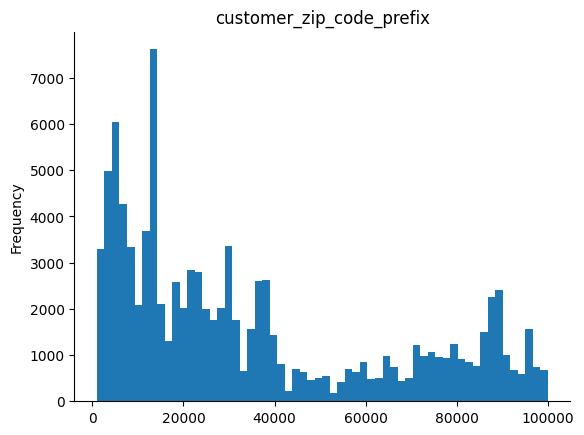

In [17]:
# @title customer_zip_code_prefix

from matplotlib import pyplot as plt
df['customer_zip_code_prefix'].plot(kind='hist', bins=60, title='customer_zip_code_prefix')
plt.gca().spines[['top', 'right',]].set_visible(False)

Pergunta: existem valores duplicados nas colunas 'customer_id' e  'customer_unique_id' ?

Para verificar se exitem valores duplicado:

In [18]:
duplicados = df['customer_id'].duplicated()

In [19]:
duplicados.head()

Indice
0    False
1    False
2    False
3    False
4    False
Name: customer_id, dtype: bool

In [20]:
duplicados.sum()

0

Podemos concluir que a coluna 'customer_id' não possui valores duplicados.

In [21]:
duplicados = df['customer_unique_id'].duplicated()

In [22]:
duplicados.sum()

3345

Mas para a coluna 'customer_unique_id' concluimos que  existem valores duplicados.

Podemos criar outro dataframe a partir da seleção de uma ou mais colunas:

In [23]:
df_user = pd.DataFrame(df['customer_id'])

In [24]:
df_user.head(3)

,customer_id
Indice,
0,06b8999e2fba1a1fbc88172c00ba8bc7
1,18955e83d337fd6b2def6b18a428ac77
2,4e7b3e00288586ebd08712fdd0374a03


Pergunta: qual o estado com maior numero de "customer_id" ?

Podemos criar um novo dataframe agrupando dados com o metodo "groupby"

In [25]:
df_state = df.groupby('customer_state').count()

In [26]:
df_state

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city
customer_state,,,,
AC,81,81,81,81
AL,413,413,413,413
AM,148,148,148,148
AP,68,68,68,68
BA,3380,3380,3380,3380
CE,1336,1336,1336,1336
DF,2140,2140,2140,2140
ES,2033,2033,2033,2033
GO,2020,2020,2020,2020


Observação: No Dataframe df_state temos o resultado de contagem de dados em cada grupo. Neste caso todos os valores de cada linha ficaram iguais, uma vez que não tinhamos valores faltando.

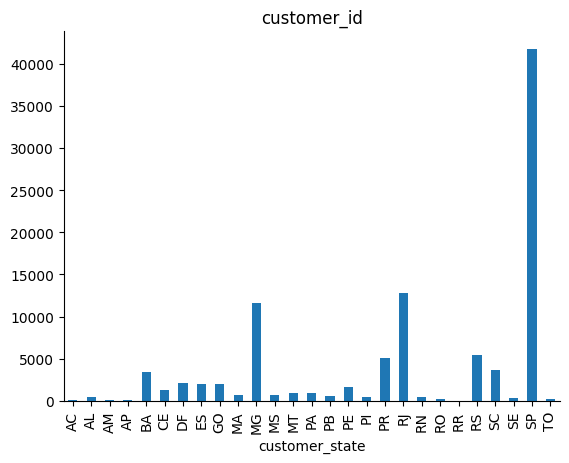

In [ ]:
# @title customer_id

from matplotlib import pyplot as plt
df_state['customer_id'].plot(kind='bar', title='customer_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

Pelo gráfico vemos que o maior número de "customer_id" é SP e podemos confirmar da seguinte forma:

In [27]:
df_state['customer_id'].max()

41746

In [28]:
df_state['customer_id'].argmax()

25

In [29]:
df_state['customer_id'].idxmax()

'SP'

Da mesma forma podemospegar o estado com menor número de 'customer_id':

In [30]:
df_state['customer_id'].min()

46

In [31]:
df_state['customer_id'].argmin()

21

In [32]:
df_state['customer_id'].idxmin()

'RR'

In [33]:
df_state.iloc[21]

customer_id                 46
customer_unique_id          46
customer_zip_code_prefix    46
customer_city               46
Name: RR, dtype: int64

In [34]:
df_state.loc["RR"]

customer_id                 46
customer_unique_id          46
customer_zip_code_prefix    46
customer_city               46
Name: RR, dtype: int64

In [35]:
df_state.iloc[1,0]

413

Lendo a tabela olist_orders_dataset.csv

In [36]:
df_orders = pd.read_csv("/content/olist_orders_dataset.csv")

In [37]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [38]:
df_orders.shape

(99441, 8)

In [39]:
from datetime import datetime

In [40]:
df_orders['order_purchase_timestamp'].loc[0]

'2017-10-02 10:56:33'

In [41]:
w = df_orders['order_purchase_timestamp'].loc[0]

In [42]:
type(w)

str

In [43]:
a = pd.to_datetime(df_orders['order_purchase_timestamp'].loc[0])

Agora podemos aplicar metodos tipicos de datas

In [44]:
a

Timestamp('2017-10-02 10:56:33')

In [45]:
a.minute

56

In [46]:
a.day_of_year

275

In [47]:
df_orders['order_approved_at'].loc[0]

'2017-10-02 11:07:15'

In [48]:
b = pd.to_datetime(df_orders['order_approved_at'].loc[0])

In [49]:
b

Timestamp('2017-10-02 11:07:15')

In [50]:
c = b - a

In [51]:
c

Timedelta('0 days 00:10:42')

In [52]:
type(c)

pandas._libs.tslibs.timedeltas.Timedelta

In [53]:
d = pd.to_datetime(df_orders['order_approved_at'].loc[0]) - pd.to_datetime(df_orders['order_purchase_timestamp'].loc[0])

In [54]:
d

Timedelta('0 days 00:10:42')

In [55]:
x = d.total_seconds()

In [56]:
x

642.0

In [57]:
type(x)

float

In [58]:
df_orders['delta'] = pd.to_datetime(df_orders['order_approved_at']) - pd.to_datetime(df_orders['order_purchase_timestamp'])

In [ ]:
# não funcionou...
df_orders['delta_sec'] = df_orders['delta'].total_seconds()

In [60]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0 days 00:10:42
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1 days 06:42:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,0 days 00:16:34


In [61]:
df_orders['delta'].describe()

count                        99281
mean     0 days 10:25:08.739486910
std      1 days 02:02:16.813098347
min                0 days 00:00:00
25%                0 days 00:12:54
50%                0 days 00:20:36
75%                0 days 14:34:51
max              187 days 21:10:50
Name: delta, dtype: object

In [62]:
df_orders['delta'].max()

Timedelta('187 days 21:10:50')

In [63]:
df_orders['delta'].loc[0].total_seconds()

642.0

Acrescentando uma coluna com o valor do delta em segundos:

In [64]:
df_orders['delta_sec'] = 0

In [65]:
# Desta forma não funcionou porque não podemos aplicar um metodo que não tem nas Series
df_orders['delta_sec'] = df_orders['delta'].total_seconds()

AttributeError: 'Series' object has no attribute 'total_seconds'

In [66]:
for i in range(df_orders.shape[0]):
  df_orders['delta_sec'].loc[i] = df_orders['delta'].loc[i].total_seconds()

<ipython-input-66-513d5cd3a571>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['delta_sec'].loc[i] = df_orders['delta'].loc[i].total_seconds()


In [67]:
df_orders.tail(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta,delta_sec
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,0 days 00:17:33,1053.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,0 days 00:07:54,474.0
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,0 days 14:22:58,51778.0


In [68]:
df_orders['delta_sec'].describe()

count    9.928100e+04
mean     3.750874e+04
std      9.373681e+04
min      0.000000e+00
25%      7.740000e+02
50%      1.236000e+03
75%      5.249100e+04
max      1.623305e+07
Name: delta_sec, dtype: float64

In [69]:
df_orders['delta_sec'].argmax()

47552

Um jeito mais complicado de encontrar o maximo:

In [70]:
q = ((df_orders.loc[df_orders['delta_sec'] == df_orders['delta_sec'].max()]).index)[0]

In [71]:
q

47552

In [72]:
type(q)

numpy.int64

In [73]:
p = df_orders['delta_sec'].argmax()

In [74]:
p

47552

In [75]:
type(p)

numpy.int64

In [76]:
df_orders['delta_sec'].max()

16233050.0

In [77]:
df_orders.shape

(99441, 10)

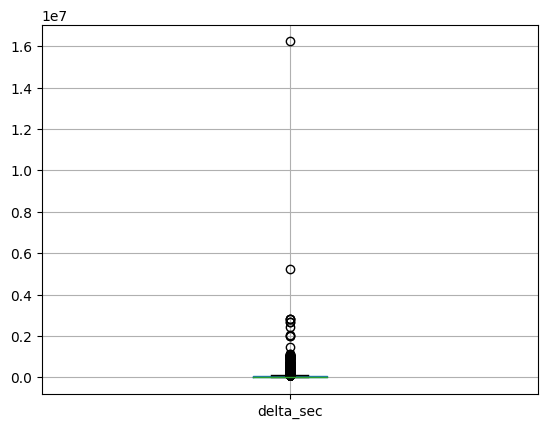

In [78]:
boxplot = df_orders.boxplot(column=['delta_sec'])

Eliminando o ponto maximo:

In [79]:
df_orders = df_orders.drop(index=p, axis=0)

In [129]:
df_orders.shape

(99440, 10)

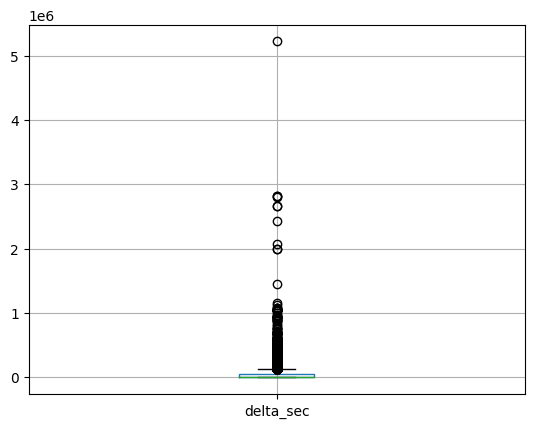

In [80]:
boxplot = df_orders.boxplot(column=['delta_sec'])

Para eliminar mais pontos outliers

In [ ]:
# deste modo não funcionou....
while df_orders['delta_sec'].max() > 1000000:
  p = df_orders['delta_sec'].argmax()
  df_orders = df_orders.drop(index=p, axis=0)

In [81]:
(df_orders['delta_sec'].argmax()) == (df_orders.loc[df_orders['delta_sec'] == df_orders['delta_sec'].max()]).index

array([False])

Um jeito mais complicado, mas que funciona:

In [82]:
while df_orders['delta_sec'].max() > 1000000:
  p = (df_orders.loc[df_orders['delta_sec'] == df_orders['delta_sec'].max()]).index
  df_orders = df_orders.drop(index=p[0], axis=0)

In [83]:
df_orders.shape

(99411, 10)

In [84]:
df_orders['delta_sec'].max()

993452.0

In [85]:
print(df_orders.loc[df_orders['delta_sec'] == df_orders['delta_sec'].max()])

                               order_id                       customer_id  \
92755  f5942dc9da4bc0e2beac653f4e63a020  3b37c1430b7f3a7e75ab75398969d054   

      order_status order_purchase_timestamp    order_approved_at  \
92755    delivered      2017-04-24 02:24:24  2017-05-05 14:21:56   

      order_delivered_carrier_date order_delivered_customer_date  \
92755          2017-05-09 15:07:39           2017-05-15 06:42:19   

      order_estimated_delivery_date            delta  delta_sec  
92755           2017-05-17 00:00:00 11 days 11:57:32   993452.0  


In [86]:
p = (df_orders.loc[df_orders['delta_sec'] == df_orders['delta_sec'].max()]).index

In [87]:
p[0]

92755

In [88]:
df_orders = df_orders.drop(index=p[0], axis=0)

In [89]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta,delta_sec
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0 days 00:10:42,642.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1 days 06:42:50,110570.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,0 days 00:16:34,994.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,0 days 00:17:53,1073.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,0 days 01:01:50,3710.0
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,0 days 00:00:00,0.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,0 days 00:11:39,699.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,0 days 00:17:33,1053.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,0 days 00:07:54,474.0


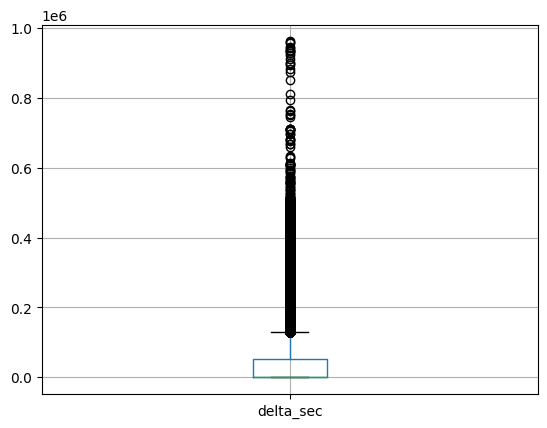

In [90]:
boxplot = df_orders.boxplot(column=['delta_sec'])

Para juntar duas tabelas:

df1.merge(df2, on='column_name', how='left')

In [91]:
df.merge(df_orders, on='customer_id', how='left')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta,delta_sec
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,0 days 00:16:37,997.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,0 days 00:10:08,608.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1 days 00:11:25,87085.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,0 days 01:22:41,4961.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,0 days 00:18:39,1119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,0 days 00:20:28,1228.0
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,0 days 00:14:50,890.0
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,0 days 00:18:13,1093.0
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,0 days 00:22:47,1367.0
